# Content Restrictions based on Local Law

Datasource from [Facebook](https://transparency.fb.com/data/content-restrictions/case-studies)

In [1]:
# concatenating all CSV files in Downloads folder
import pandas as pd
import glob, os
import seaborn as sns
import matplotlib.pyplot as plt
from pywaffle import Waffle
import altair as alt
alt.renderers.enable('default')

# get all the paths names for the csv
path = r'C:\Users\chi-t\Desktop\Projects Lede\Project 9 FB Restrictions\Content Restrictions'
all_files = glob.glob(os.path.join(path, "Content*.csv"))
all_files[0:2]

['C:\\Users\\chi-t\\Desktop\\Projects Lede\\Project 9 FB Restrictions\\Content Restrictions\\Content Restrictions-2013_H2.csv',
 'C:\\Users\\chi-t\\Desktop\\Projects Lede\\Project 9 FB Restrictions\\Content Restrictions\\Content Restrictions-2014_H1.csv']

In [2]:
# combine all files and export as csv with looping through each csv path
all_df = []
for f in all_files:
    df = pd.read_csv(f)
    # remove the column with Unnamed 
    df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
    # create a column with the filename
    df['file'] = os.path.basename(f)
    all_df.append(df)

# combine all the years into one dataframe
merged_df = pd.concat(all_df, ignore_index=True, sort=True)
merged_df.head(5)

,Country,count,file
0,Australia,48,Content Restrictions-2013_H2.csv
1,Austria,78,Content Restrictions-2013_H2.csv
2,Bangladesh,3,Content Restrictions-2013_H2.csv
3,France,80,Content Restrictions-2013_H2.csv
4,Germany,84,Content Restrictions-2013_H2.csv


#### Data Wrangling

In [3]:
# Extract from the filename and assign a year column
merged_df['Year']= merged_df.file.str.extract(r'(\d{4})')

# Extract from the filename and assign the half-year

merged_df['Halfyear']= merged_df.file.str.extract(r'(H\d)')

merged_df= merged_df.drop("file",axis=1)

# Rename the count column since count is also a function in pandas
merged_df=merged_df.rename(columns={"count": "Restrictions"})

# replace the thousand seperators in the column Restrictions, add regex=True!!
merged_df['Restrictions'] = merged_df.Restrictions.replace(',' , '',regex=True)

# turn the Restrictions strings into integers
merged_df['Restrictions'] = pd.to_numeric(merged_df['Restrictions'])

# drop the columns where there is a missing value in Restrictions and a 0
merged_df = merged_df[merged_df.Restrictions!=0]
merged_df = merged_df[merged_df['Restrictions'].notna()]

# drop the columns where there is NaN in Country since there were summations in the Excel
merged_df = merged_df[merged_df['Country'].notna()]

# save as a csv
merged_df.to_csv("merged.csv",index=False)

In [4]:
# check the datatypes
merged_df.dtypes

Country         object
Restrictions     int64
Year            object
Halfyear        object
dtype: object

In [5]:
# check how many rows and columns it has
merged_df.shape

(786, 4)

## Trend Line from 2013 to 2021

In [6]:
# plot accroding to Regime type
alt.Chart(merged_df,width=500, height=300).mark_bar(size=50).encode(
    x=alt.Y('Year:O', axis=alt.Axis(title='')),
    y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='Count of Restrictions')),
    color=alt.condition(
        alt.FieldEqualPredicate(field='Year', equal= '2015'),  # If the year is 1810 this test returns True,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )

).properties(
    title='Development of Restrictions for all Countries',

).configure_axisX(labelAngle=0)

alt.Chart(...)

In [7]:
# How many restrictions each year has in numbers
merged_df.groupby(by="Year").Restrictions.sum()

Year
2013     7371
2014    18481
2015    76395
2016    16610
2017    42330
2018    51309
2019    33633
2020    64726
Name: Restrictions, dtype: int64

## What happened at the spikes for 2015 and 2020?

In [8]:
# closer look at the year 2015 and 2020
rest2015 =merged_df[merged_df.Year=='2015'].groupby(by="Country").sum().sort_values(by='Restrictions',ascending=False).head(6)
rest2020 =merged_df[merged_df.Year=='2020'].groupby(by="Country").sum().sort_values(by='Restrictions',ascending=False).head(6)

### France and India were responsible for the spikes in 2015

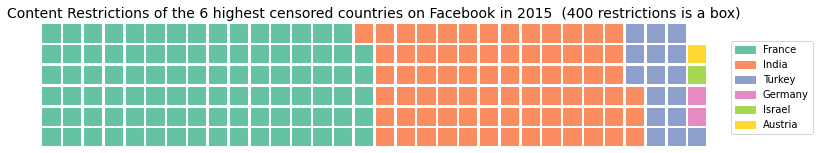

In [9]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


fig = plt.figure(
    FigureClass=Waffle, 
    title={
        'label': 'Content Restrictions of the 6 highest censored countries on Facebook in 2015  (400 restrictions is a box)',
        'loc': 'center',
        'fontdict': {
        'fontsize': 14
            }
    },
    rows=6,
    values=list(rest2015.values/400),
    labels=list(rest2015.index),
    figsize=(11, 6),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.03, 0.9)}
)

# save as svg
plt.savefig('style/images/Waffle.pdf', transparent = True)

#### France

Jul - Dec 2015 Update
We restricted access in France to content reported under laws prohibiting Holocaust denial and condoning terrorism, as well 32,100 instances of a single image related to the November 2015 terrorist attacks in Paris that was alleged by OCLCTIC to violate French laws related to the protection of human dignity.

#### India

Jan - Jun 2015 Update
We restricted access in India to categories of content in response to requests from government agencies, including law enforcement agencies and the India Computer Emergency Response Team within the Ministry of Communications and Information Technology. We also restricted access to content in categories these agencies identified as illegal that have been brought to our attention by non-government entities, such as NGOs and members of the Facebook community. The majority of the content was restricted under local laws against anti-religious and hate speech that could cause unrest and disharmony within India.

Jul - Dec 2015 Update
We restricted access to content in India in response to legal requests from law enforcement agencies and the India Computer Emergency Response Team within the Ministry of Communications and Information Technology. The majority of content restricted was alleged to violate local laws against anti-religious speech and hate speech.

[Note: In 2016, informed by the decision of the Supreme Court of India last year amending the proper interpretation of the Information Technology Act of 2000, we ceased acting upon legal requests to remove access to content unless received by way of a binding court order and/or a notification by an authorized agency which conforms to the constitutional safeguards as directed by the Supreme Court.]

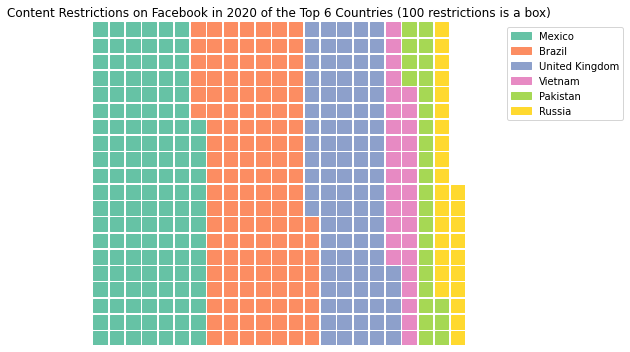

In [10]:
fig = plt.figure(
    FigureClass=Waffle, 
    title={
        'label': 'Content Restrictions on Facebook in 2020 of the Top 6 Countries (100 restrictions is a box)',
        'loc': 'center',
        'fontdict': {
        'fontsize': 12
            }
    },
    rows=20,
    values=list(rest2020.values/100),
    labels=list(rest2020.index),
    figsize=(10, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)


## What were the biggest censorship events on Facebook?

In [11]:
# save the names of only the Top 10 countries with highest restrictions overall
top10countries=merged_df.groupby(by="Country").Restrictions.sum().sort_values(ascending=False).head(10).index

# save the names of only the Top 15 countries with highest restrictions overall
top15countries=merged_df.groupby(by="Country").Restrictions.sum().sort_values(ascending=False).head(15).index

# save the names of only the Top 20 countries with highest restrictions overall
top20countries=merged_df.groupby(by="Country").Restrictions.sum().sort_values(ascending=False).head(20).index
top20countries

Index(['India', 'Mexico', 'France', 'Turkey', 'Brazil', 'Pakistan', 'Germany',
       'United Kingdom', 'Russia', 'Israel', 'Vietnam', 'Thailand', 'Italy',
       'South Korea', 'Austria', 'Sri Lanka', 'Indonesia', 'Argentina',
       'Spain', 'Hong Kong'],
      dtype='object', name='Country')

In [12]:
merged_df.sort_values(by=['Restrictions'], ascending= False).head(20)

,Country,Restrictions,Year,Halfyear
68,France,37695,2015,H2
136,Mexico,20527,2017,H1
315,India,17713,2018,H2
53,India,15155,2015,H1
71,India,14971,2015,H2
1142,Brazil,11859,2020,H2
1252,Mexico,7064,2020,H2
1000,Mexico,6335,2020,H1
1349,United Kingdom,6080,2020,H2
34,India,5832,2014,H2


In [13]:
# save the top20 and top10, top15 countries as dataframes for viz comparisons
top20=merged_df[merged_df.Country.isin (top20countries)]
top10=merged_df[merged_df.Country.isin (top10countries)]
top15=merged_df[merged_df.Country.isin (top15countries)]

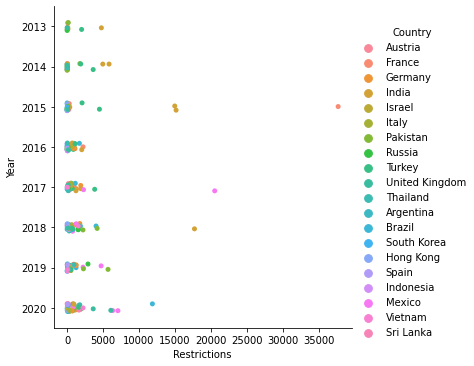

In [14]:
# Plot the top 20 countries by years and Restrictions

sns.catplot(data=top20, y='Year', x='Restrictions', hue='Country')

##color only the outliers!!

In [15]:
# If you are working in a notebook environment,
# the chart is only displayed if the last line of the cell evaluates to a chart object


chart= alt.Chart(top15, width=400, height=500).mark_circle().encode(
    x='Year',
    y='Country',
    size='sum(Restrictions)',
    color='Country'
).interactive().configure_axisX(labelAngle=0)

chart

alt.Chart(...)

In [16]:
# plot according to the Top 10 Countries over the years
alt.Chart(top10,width=500, height=300).mark_bar().encode(
    x='Year:O',
    y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='Count of Restrictions')),
    color='Country'
).interactive().properties(
    title='Development of Restrictions from the Top 10 Countries with highest restrictions',

)


## use bars of small multiples

alt.Chart(...)

## Which countries had the most restriction requests overall?

<AxesSubplot:title={'center':'Top 30 Countries with the most restrictions'}, xlabel='Country', ylabel='Restrictions'>

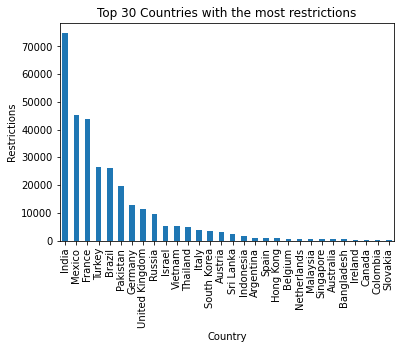

In [17]:
merged_df.groupby(by="Country").Restrictions.sum().sort_values(ascending=False).head(30).plot(kind='bar',ylabel="Restrictions",title="Top 30 Countries with the most restrictions")

how many users did facebook have each year? how many posts were made each year

## Scrape the Democracy Index from Wikipedia since the you need to enter personal data for Economist reports

In [18]:
# read in the tables
tables=pd.read_html('https://en.wikipedia.org/wiki/Democracy_Index')
print(f'Total tables: {len(tables)}')

Total tables: 10


In [19]:
# find out which table we want and save it in a new dataframe

wikidf = tables[5]

# drop the column 2020 rank not to have it twice and the years where Fb did not have any data
wikidf = wikidf.drop(['2020 Rank','2006','2008','2010','2011','2012'], axis=1)
wikidf.head(10)

,Region,Country,Regime type,2013,2014,2015,2016,2017,2018,2019,2020
0,North America,Canada,Full democracy,9.08,9.08,9.08,9.15,9.15,9.15,9.22,9.24
1,North America,United States,Flawed democracy,8.11,8.11,8.05,7.98,7.98,7.96,7.96,7.92
2,Western Europe,Austria,Full democracy,8.48,8.54,8.54,8.41,8.42,8.29,8.29,8.16
3,Western Europe,Belgium,Flawed democracy,8.05,7.93,7.93,7.77,7.78,7.78,7.64,7.51
4,Western Europe,Cyprus,Flawed democracy,7.29,7.40,7.53,7.65,7.59,7.59,7.59,7.56
5,Western Europe,Denmark,Full democracy,9.38,9.11,9.11,9.20,9.22,9.22,9.22,9.15
6,Western Europe,Finland,Full democracy,9.03,9.03,9.03,9.03,9.03,9.14,9.25,9.20
7,Western Europe,France,Flawed democracy,7.92,8.04,7.92,7.92,7.80,7.80,8.12,7.99
8,Western Europe,Germany,Full democracy,8.31,8.64,8.64,8.63,8.61,8.68,8.68,8.67
9,Western Europe,Greece,Flawed democracy,7.65,7.45,7.45,7.23,7.29,7.29,7.43,7.39


In [20]:
wikidf = wikidf.melt(id_vars=['Region','Country','Regime type'],
                       value_vars=['2013', '2014', '2015','2016','2017','2018','2019','2020'],
                       var_name='Year',
                       value_name='Democracy Index')

# since I have worked with the Year column as a string column before, I will turn it into strings here as well
wikidf.Year= wikidf.Year.astype(str)

wikidf.sample(10)

,Region,Country,Regime type,Year,Democracy Index
962,Sub-Saharan Africa,Burundi,Authoritarian,2018,2.33
135,Sub-Saharan Africa,Democratic Republic of the Congo,Authoritarian,2013,1.83
1058,Latin America and the Caribbean,Costa Rica,Full democracy,2019,8.13
1023,Western Europe,Turkey,Hybrid regime,2019,4.09
960,Sub-Saharan Africa,Botswana,Flawed democracy,2018,7.81
556,Latin America and the Caribbean,Colombia,Flawed democracy,2016,6.67
764,Asia and Australasia,Singapore,Flawed democracy,2017,6.32
561,Latin America and the Caribbean,El Salvador,Hybrid regime,2016,6.64
653,Sub-Saharan Africa,Mauritania,Authoritarian,2016,3.96
1256,Asia and Australasia,Malaysia,Flawed democracy,2020,7.19


In [21]:
# check the datatypes
wikidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           1336 non-null   object 
 1   Country          1336 non-null   object 
 2   Regime type      1336 non-null   object 
 3   Year             1336 non-null   object 
 4   Democracy Index  1336 non-null   float64
dtypes: float64(1), object(4)
memory usage: 52.3+ KB


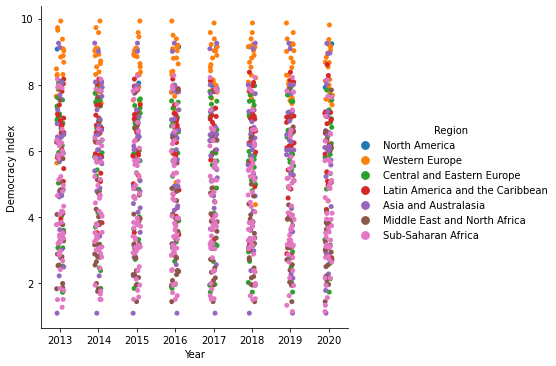

In [22]:
# Now I can plot whatever I want!
sns.catplot(data=wikidf, y='Democracy Index', x='Year', hue='Region')

#### Merging our two datasets

In [23]:
# merge the two datasets
new_df = pd.merge(merged_df, wikidf,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])

In [24]:
# create dataframes for sum of Restrictions by Country
Countries=new_df.groupby(by='Country').Restrictions.sum().index
Restrictions=new_df.groupby(by='Country').Restrictions.sum().values
dataset = pd.DataFrame({'Country': Countries, 'Restrictions': list(Restrictions)}, columns=['Country', 'Restrictions'])
dataset
# create dataframes for average democracy index by Country
new_df = new_df[new_df['Democracy Index'].notna()]
countries=new_df.groupby(by="Country")['Democracy Index'].mean().index
index=new_df.groupby(by="Country")['Democracy Index'].mean().values
dataset2 = pd.DataFrame({'Country': countries, 'Democracy Index': index}, columns=['Country', 'Democracy Index'])
dataset2

# merge the two datasets
map_df = pd.merge(dataset, dataset2,  how='left', left_on=['Country'], right_on = ['Country'])
map_df.sample(10)

,Country,Restrictions,Democracy Index
138,Mauritius,12,8.140000
17,Bangladesh,392,5.828750
235,Ukraine,58,5.765000
165,Pakistan,19588,4.354286
70,Faroe Islands,12,NaN
22,Benin,12,4.580000
188,Saint Vincent and the Grenadines,12,NaN
90,Guinea,12,3.080000
65,Equatorial Guinea,12,1.920000
6,Angola,12,3.660000


In [25]:
# save as csv for mapping
map_df.to_csv('Map.csv', index=False)

In [26]:
new_df.sample(10)

,Country,Restrictions,Year,Halfyear,Region,Regime type,Democracy Index
430,Germany,1245,2019,H2,Western Europe,Full democracy,8.68
432,Hong Kong,394,2019,H2,Asia and Australasia,Hybrid regime,6.02
405,Switzerland,4,2019,H1,Western Europe,Full democracy,9.03
296,Canada,11,2018,H2,North America,Full democracy,9.15
394,Poland,13,2019,H1,Central and Eastern Europe,Flawed democracy,6.62
424,Egypt,3,2019,H2,Middle East and North Africa,Authoritarian,3.06
431,Greece,6,2019,H2,Western Europe,Flawed democracy,7.43
395,Portugal,22,2019,H1,Western Europe,Flawed democracy,8.03
373,Indonesia,493,2019,H1,Asia and Australasia,Flawed democracy,6.48
321,Kazakhstan,1,2018,H2,Central and Eastern Europe,Authoritarian,2.94


In [27]:
# checking the datatypes again after merging
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 785
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          690 non-null    object 
 1   Restrictions     690 non-null    int64  
 2   Year             690 non-null    object 
 3   Halfyear         690 non-null    object 
 4   Region           690 non-null    object 
 5   Regime type      690 non-null    object 
 6   Democracy Index  690 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 43.1+ KB


In [28]:
# count the NaN values for each column
new_df.isnull().sum()

Country            0
Restrictions       0
Year               0
Halfyear           0
Region             0
Regime type        0
Democracy Index    0
dtype: int64

##### Taking a look at the rows with missing democracy index

In [29]:
# show the rows that have NaN values
# pandas.DataFrame.any(axis=1) to get a boolean Series indicating whether each row in the previous result pandas.DataFrame contains at least one True
countries_without_index=new_df[new_df.isnull().any(axis=1)]

# look which countries have no democracy index
countries_without_index.Country.unique()

array([], dtype=object)

Most of the countries are not even countries but islands belonging to other countries ore really small sovereign states. To answer the questions if there is a correlation between freedom of speech, being a democratic country and the restrictions Facebook makes, we can delete those rows as they are not that relevant.

In [30]:
# take a look from the countries without interest if there are interesting datapoints
countries_without_index.sort_values(by='Restrictions',ascending=False).head(5)

,Country,Restrictions,Year,Halfyear,Region,Regime type,Democracy Index


Monaco had the most restrictions from that list and it concerns private reports of defamations.

Jan - Jun 2019 Update
We restricted access in Monaco to 82 items in response to private reports related to defamation.
Jul - Dec 2019 Update
We restricted access in Monaco to 32 items in response to private reports of defamation.

In [31]:
# drop the rows with NaN

new_df = new_df[new_df['Democracy Index'].notna()]
new_df.shape

(690, 7)

### Doing some analysis

<AxesSubplot:ylabel='Regime type'>

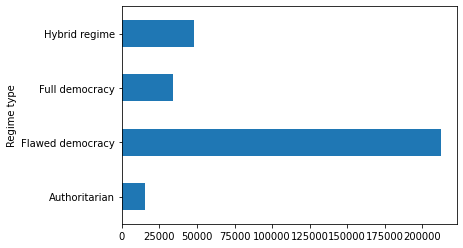

In [32]:
# Which Regime type has the most restrictions?

new_df.groupby(by='Regime type').Restrictions.sum().plot(kind='barh')

In [33]:
new_df.corr().style.background_gradient(cmap='coolwarm')

#dont mention

,Restrictions,Democracy Index
Restrictions,1.000000,0.032640
Democracy Index,0.032640,1.000000


There seems to be a positive correlation on first sight overall.

In [34]:
# what are the countries with low index
new_df.sort_values(by='Democracy Index',ascending=True).head(5)

,Country,Restrictions,Year,Halfyear,Region,Regime type,Democracy Index
696,North Korea,12,2020,H2,Asia and Australasia,Authoritarian,1.08
592,Democratic Republic of the Congo,12,2020,H2,Sub-Saharan Africa,Authoritarian,1.13
577,Central African Republic,12,2020,H2,Sub-Saharan Africa,Authoritarian,1.32
751,Syria,12,2020,H2,Middle East and North Africa,Authoritarian,1.43
578,Chad,12,2020,H2,Sub-Saharan Africa,Authoritarian,1.55


Most of them are Authoritarian countries but have a low number of restrictions. This could be because the IT infrastructure is not available in their country and not a lot of people use Facebook hence they might not need to censore Facebook. It is better to reduce that bias in our data by adding data about the Facebook users in that country.


North Korea should have no Facebook, so what are these restrictions?
This is from a general restriction done in every country:
Jul - Dec 2020 Update
In response to an order from Justice Alexandre de Moraes of Brazil's Supreme Court related to 12 profiles and Pages of supporters of Brazilian President Bolsonaro, we restricted access globally to this content, including in North Korea. While we respect the law in countries where we operate, we strongly oppose extraterritorial legal demands such as the one resulting in these restrictions, and have actively pursued all options to appeal the order. As of May 19, 2021, our appeal to the Brazilian Supreme Court's full bench is pending.

This was logged regardless of country or Facebook assess it seems.

## Which of these countries are democratic?

In [35]:
# filter the top30 countries with highest Restrictions
top30countries=new_df.groupby(by="Country").Restrictions.sum().sort_values(ascending=False).head(30).index

# save the top30 countries as dataframes
top30=new_df[new_df.Country.isin (top30countries)]

# plot the barchart
chart1=alt.Chart(top30,width=500, height=300).mark_bar().encode(
    x=alt.X('Country:O', sort=alt.EncodingSortField(field="Restrictions", order='descending')),
    y='Restrictions:Q',
    color='Regime type:N'
)

# plot accroding to Regime type
chart2=alt.Chart(new_df,width=500, height=500).mark_bar().encode(
    x='Year:O',
    y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='')),
    color='Regime type:N',
    row=alt.Row('Regime type:N')
).properties(height=60, width=200)

chart1|chart2

alt.HConcatChart(...)

In [36]:
# plot according to Regions
alt.Chart(new_df,width=500, height=300).mark_bar().encode(
    x='Year:O',
     y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='Count of Restrictions')),
    color='Region'
).properties(
    title='Development of Restrictions by Region',
)

##leave out

alt.Chart(...)

In [37]:
# plot according to the Top 30 Countries
alt.Chart(top30,width=500, height=300).mark_line().encode(
    x='Year:O',
     y=alt.Y('sum(Democracy Index)', axis=alt.Axis(title='Democracy Index')),
    color='Country'
).interactive().properties(
    title='Development of Democracy Index from the top 30 countries with highest restrictions',
)

alt.Chart(...)

## Adding a new Metric for Facebook usage

In [38]:
# read in the tables
fbusers=pd.read_html('https://worldpopulationreview.com/country-rankings/facebook-users-by-country')
print(f'Total tables: {len(fbusers)}')

# save that first table as a dataframe
fbusers= fbusers[0]

Total tables: 1


In [39]:
# Cuba has no Facebook user data so we delete that row
fbusers = fbusers[fbusers['Facebook Users (2019)'].notna()]

# convert the float number into integer
fbusers['Facebook Users (2019)']=fbusers['Facebook Users (2019)'].astype(int)

fbusers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                227 non-null    object
 1   Facebook Users (2019)  227 non-null    int32 
 2   2021 Population        227 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 6.2+ KB


The facebook user number is from 2019 but the population number is from 2021. Maybe just create a general facebook usage index by dividing the number with the total population since we just want to eliminate the countries with low Facebook usage in general.

In [40]:
# create a new metric

fbusers['FB Usage Ratio to Population']= (fbusers['Facebook Users (2019)']/fbusers['2021 Population']).round(2)

In [41]:
# drop the population column
fbusers= fbusers.drop('2021 Population',axis=1)

fbusers.head(10)

,Country,Facebook Users (2019),FB Usage Ratio to Population
0,India,251000000,0.18
1,United States,240000000,0.72
2,Brazil,139000000,0.65
3,Indonesia,136960000,0.50
4,Mexico,78000000,0.60
5,Philippines,71760000,0.65
6,Vietnam,66720000,0.68
7,Thailand,46000000,0.66
8,United Kingdom,44000000,0.65
9,Turkey,44000000,0.52


India's population for 2019 was 1.366 billion, which using this number as a dividor stil results to 0.18 if rounded to 2 decimals. So I am saving myself some work here by not using the exact 2019 data since it is a rounded metric that shows only an approximation.

In [42]:
# merge the two dataframes again
final_df = pd.merge(new_df, fbusers,  how='left', left_on=['Country'], right_on = ['Country'])

final_df.sample(10)

,Country,Restrictions,Year,Halfyear,Region,Regime type,Democracy Index,Facebook Users (2019),FB Usage Ratio to Population
152,Australia,32,2017,H2,Asia and Australasia,Full democracy,9.09,15000000.0,0.58
639,Palestine,12,2020,H2,Middle East and North Africa,Authoritarian,3.83,2677000.0,0.51
377,Laos,1,2019,H1,Asia and Australasia,Authoritarian,2.14,3056000.0,0.41
19,Italy,3,2014,H1,Western Europe,Flawed democracy,7.85,30000000.0,0.50
294,Chile,3,2018,H2,Latin America and the Caribbean,Full democracy,7.97,13000000.0,0.68
322,Lithuania,1,2018,H2,Central and Eastern Europe,Flawed democracy,7.50,1400000.0,0.52
191,Morocco,20,2017,H2,Middle East and North Africa,Hybrid regime,4.87,18330000.0,0.49
534,Azerbaijan,12,2020,H2,Central and Eastern Europe,Authoritarian,2.68,1854000.0,0.18
349,Turkey,747,2018,H2,Western Europe,Hybrid regime,4.37,44000000.0,0.52
602,Kazakhstan,12,2020,H2,Central and Eastern Europe,Authoritarian,3.14,9246000.0,0.49


In [43]:
# count the NaN values for each column
final_df.isnull().sum()

Country                          0
Restrictions                     0
Year                             0
Halfyear                         0
Region                           0
Regime type                      0
Democracy Index                  0
Facebook Users (2019)           10
FB Usage Ratio to Population    10
dtype: int64

In [44]:
# find out the countries with FB usage data
countries_without_fb=final_df[final_df.isnull().any(axis=1)]
countries_without_fb.Country.unique()

array(['Trinidad and Tobago', 'Bosnia and Herzegovina', 'Cuba',
       'Democratic Republic of the Congo', 'Guinea-Bissau',
       'Republic of the Congo', 'Timor-Leste'], dtype=object)

Manually looking for the missing data from the table:

[Democratic Republic of the Congo](https://napoleoncat.com/stats/facebook-users-in-dr_congo/2019/03): There were 2 218 000 Facebook users in DR Congo in March 2019, which accounted for 2.4% of its entire population.

[Trinidad and Tobago](https://napoleoncat.com/stats/facebook-users-in-trinidad_and_tobago/2020/03): There were 878 000 Facebook users in Trinidad and Tobago in March 2020, which accounted for 63.9% of its entire population.

[Bosnia and Herzegovina](https://napoleoncat.com/stats/facebook-users-in-bosnia_and_herzegovina/2020/02): There were 1 668 000 Facebook users in Bosnia and Herzegovina in February 2020, which accounted for 48% of its entire population.

For the other countries I did not find any data

In [45]:
# enter the numbers for Congo, have to use loc!!!

final_df.loc[563,('Facebook Users (2019)')]= 2218000
final_df.loc[563,('FB Usage Ratio to Population')]= 0.02

# enter the numbers for Trinidad and Tobago
final_df.loc[[275,348,674],('Facebook Users (2019)')]= 878000
final_df.loc[[275,348,674],('FB Usage Ratio to Population')]= 0.64

# enter the numbers for Bosnia and Herzegovina
final_df.loc[[473,542],('Facebook Users (2019)')]= 1668000
final_df.loc[[473,542],('FB Usage Ratio to Population')]= 0.48

In [46]:
# code to look for the indexing and check if the values were replaced

final_df[final_df.Country.str.match('Bosnia and Herzegovina')]

,Country,Restrictions,Year,Halfyear,Region,Regime type,Democracy Index,Facebook Users (2019),FB Usage Ratio to Population
473,Bosnia and Herzegovina,1,2020,H1,Central and Eastern Europe,Hybrid regime,4.84,1668000.0,0.48
542,Bosnia and Herzegovina,12,2020,H2,Central and Eastern Europe,Hybrid regime,4.84,1668000.0,0.48


In [47]:
# check again how many null values we have in each column
final_df.isnull().sum()

Country                         0
Restrictions                    0
Year                            0
Halfyear                        0
Region                          0
Regime type                     0
Democracy Index                 0
Facebook Users (2019)           4
FB Usage Ratio to Population    4
dtype: int64

In [48]:
# look for the rows with lowest facebook usage ratio
final_df.sort_values(by='FB Usage Ratio to Population').head(10)

,Country,Restrictions,Year,Halfyear,Region,Regime type,Democracy Index,Facebook Users (2019),FB Usage Ratio to Population
635,North Korea,12,2020,H2,Asia and Australasia,Authoritarian,1.08,14000.0,0.00
555,China,12,2020,H2,Asia and Australasia,Authoritarian,2.27,1330000.0,0.00
50,China,5,2015,H1,Asia and Australasia,Authoritarian,3.14,1330000.0,0.00
677,Turkmenistan,12,2020,H2,Central and Eastern Europe,Authoritarian,1.72,67200.0,0.01
571,Eritrea,12,2020,H2,Sub-Saharan Africa,Authoritarian,2.15,21900.0,0.01
633,Niger,12,2020,H2,Sub-Saharan Africa,Authoritarian,3.29,500200.0,0.02
552,Central African Republic,12,2020,H2,Sub-Saharan Africa,Authoritarian,1.32,122100.0,0.02
553,Chad,12,2020,H2,Sub-Saharan Africa,Authoritarian,1.55,328000.0,0.02
563,Democratic Republic of the Congo,12,2020,H2,Sub-Saharan Africa,Authoritarian,1.13,2218000.0,0.02
663,Sudan,12,2020,H2,Middle East and North Africa,Authoritarian,2.54,1300000.0,0.03


There are countries like China and India that have huge populations, which make the FB usage ratio smaller. We want to keep the data from a certain FB users mumbers and eliminate those with small FB Usage ratio.

In [49]:
# filter our dataframe

filtered_df=final_df[(final_df['Facebook Users (2019)']>50000000) | (final_df['FB Usage Ratio to Population']>0.5)]

In [50]:
filtered_df.sort_values(by='FB Usage Ratio to Population').head(10)

,Country,Restrictions,Year,Halfyear,Region,Regime type,Democracy Index,Facebook Users (2019),FB Usage Ratio to Population
179,India,1914,2017,H2,Asia and Australasia,Flawed democracy,7.23,251000000.0,0.18
71,India,14971,2015,H2,Asia and Australasia,Flawed democracy,7.74,251000000.0,0.18
428,India,841,2019,H2,Asia and Australasia,Flawed democracy,6.90,251000000.0,0.18
109,India,719,2016,H2,Asia and Australasia,Flawed democracy,7.81,251000000.0,0.18
53,India,15155,2015,H1,Asia and Australasia,Flawed democracy,7.74,251000000.0,0.18
369,India,1250,2019,H1,Asia and Australasia,Flawed democracy,6.90,251000000.0,0.18
130,India,1228,2017,H1,Asia and Australasia,Flawed democracy,7.23,251000000.0,0.18
90,India,2034,2016,H1,Asia and Australasia,Flawed democracy,7.81,251000000.0,0.18
312,India,17713,2018,H2,Asia and Australasia,Flawed democracy,7.23,251000000.0,0.18
487,India,824,2020,H1,Asia and Australasia,Flawed democracy,6.61,251000000.0,0.18


In [51]:
filtered_df.corr().style.background_gradient(cmap='coolwarm')

,Restrictions,Democracy Index,Facebook Users (2019),FB Usage Ratio to Population
Restrictions,1.000000,-0.023085,0.474153,-0.357053
Democracy Index,-0.023085,1.000000,-0.039726,-0.188879
Facebook Users (2019),0.474153,-0.039726,1.000000,-0.595836
FB Usage Ratio to Population,-0.357053,-0.188879,-0.595836,1.000000


In [52]:
filtered_df.Restrictions.value_counts()

1       46
12      30
2       24
5       14
3       12
        ..
4727     1
630      1
629      1
110      1
1019     1
Name: Restrictions, Length: 160, dtype: int64

The democracy index does not correlate with the amount of restrictions. For a FB usage ratio of over 50% and huge Facebook user number there is a correlation between the amount of Facebook Users and the restrictions.

## For which countries was there an inverse correlation between democracy index and censors?

In [53]:
authoritarian= new_df[new_df['Regime type']=='Authoritarian']
flawed= new_df[new_df['Regime type']=='Flawed democracy']
full= new_df[new_df['Regime type']=='Full democracy']
hybrid= new_df[new_df['Regime type']=='Hybrid regime']

In [54]:
# plot 
chart1=alt.Chart(authoritarian,width=500, height=300).mark_bar().encode(
    x='Year:O',
    y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='Count of Restrictions')),
    color='Country'
).interactive().properties(
    title='Development of Restrictions from Authoritarian Countries',
    width=300
)

# plot 
chart2= alt.Chart(authoritarian,width=500, height=300).mark_line().encode(
    x='Year:O',
    y=alt.Y('Democracy Index', axis=alt.Axis(title='Democracy Index')),
    color='Country'
).interactive().properties(
    title='Development of Democracy Index from Authoritarian Countries',
    width=300
)

chart1 | chart2


alt.HConcatChart(...)

In [55]:
# plot 
chart1=alt.Chart(flawed,width=500, height=300).mark_bar().encode(
    x='Year:O',
    y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='Count of Restrictions')),
    color='Country'
).interactive().properties(
    title='Development of Restrictions from Flawed Democracies',
    width=300
)

# plot 
chart2= alt.Chart(flawed,width=500, height=300).mark_line().encode(
    x='Year:O',
    y=alt.Y('Democracy Index', axis=alt.Axis(title='Democracy Index')),
    color='Country'
).interactive().properties(
    title='Development of Democracy Index from Flawed Democracies',
    width=300
)

chart1 | chart2


alt.HConcatChart(...)

In [56]:
# plot
chart1=alt.Chart(hybrid,width=500, height=300).mark_bar().encode(
    x='Year:O',
    y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='Count of Restrictions')),
    color='Country'
).interactive().properties(
    title='Development of Restrictions from Hybrid Regimes',
    width=300
)

# plot 
chart2= alt.Chart(hybrid,width=500, height=300).mark_line().encode(
    x='Year:O',
    y=alt.Y('Democracy Index', axis=alt.Axis(title='Democracy Index')),
    color='Country'
).interactive().properties(
    title='Development of Democracy Index from Hybrid Regimes',
    width=300
)

chart1 | chart2


alt.HConcatChart(...)

In [57]:
# plot
chart1=alt.Chart(full,width=500, height=300).mark_bar().encode(
    x='Year:O',
    y=alt.Y('sum(Restrictions)', axis=alt.Axis(title='Count of Restrictions')),
    color='Country'
).interactive().properties(
    title='Development of Restrictions from Full Democracies',
    width=300
)

# plot 
chart2= alt.Chart(full,width=500, height=300).mark_line().encode(
    x='Year:O',
    y=alt.Y('Democracy Index', axis=alt.Axis(title='Democracy Index')),
    color='Country'
).interactive().properties(
    title='Development of Democracy Index from Full Democracies',
    width=300
)

chart1 | chart2

alt.HConcatChart(...)

In [58]:
base = alt.Chart(width=500, height=300).encode(
    alt.X('Year:O', axis=alt.Axis(title=None))
)

restrictions = base.mark_line(opacity=0.3, color='#57A44C').encode(
    alt.Y('sum(Restrictions)',
          axis=alt.Axis(title='Restrictions', titleColor='#57A44C'))
)

index = base.mark_line(stroke='#5276A7', color='#5276A7').encode(
    alt.Y('Democracy Index',
          axis=alt.Axis(title='Democracy Index', titleColor='#5276A7'))
)

alt.layer(restrictions,index,data=top30).resolve_scale(
    y = 'independent'
)

alt.concat(*(
    alt.layer(restrictions,index,data=top30,title=f"{country}").transform_filter(alt.FieldEqualPredicate(field='Country', equal= country)).resolve_scale(y='independent')
    for country in top30.Country.unique()
))


# cannot use facet and resolve_scale together: have to filter the data: This is not possible currently due to a bug in Vega-Lite; see vega/vega-lite#4373
# FieldEqualPredicate evaluates whether a field is equal to a particular value

alt.ConcatChart(...)